# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pathlib
import matplotlib.pyplot as plt

In [2]:
# Importing Tensorflow
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.15.0


In [3]:
!pip install git+https://github.com/tensorflow/docs # Use some functions from tensorflow_docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-2q6ofkax
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-2q6ofkax
  Resolved https://github.com/tensorflow/docs to commit ec3a1b3f9a604c6cd26c7537f2b9fd270a3eedbf
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2024.3.27.3713-py3-none-any.whl size=182447 sha256=6ed499b1dd8d681934c98a948e84784dea2e2b5cc1ede16c1fb43e6670f53285
  Stored in directory: /tmp/pip-ephem-wheel-cache-fhtgnwzb/wheels/86/0f/1e/3b62293c8ffd0fd5a49508e6871cdb7554abe9c62afd35ec53
Successfully built tensorflow-docs


In [4]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [5]:
#plotly used for plotting Interactive Graphs
!pip install plotly
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go

# Loading Dataset

Don't forget to load dataset `'dataset.csv'` in Colab or your working directory in Jupyter!

The dataset can be downloaded from this [link](https://raw.githubusercontent.com/AjinkyaChavan9/RGB-Color-Classifier-with-Deep-Learning-using-Keras-and-Tensorflow/master/Dataset/final_data.csv)  and Right Click to Select **Save As** option in order to download

In [6]:
dataset = pd.read_csv('final_data.csv')
dataset

,red,green,blue,label
0,20,139,240,Blue
1,174,83,72,Brown
2,144,249,131,Green
3,168,25,156,Pink
4,30,182,136,Green
...,...,...,...,...
5047,26,26,26,Black
5048,27,27,27,Black
5049,28,28,28,Black
5050,29,29,29,Black


In [8]:
dataset.describe()

,red,green,blue
count,5052.000000,5052.000000,5052.000000
mean,127.416073,126.316310,128.296912
std,73.958449,74.927131,74.174008
min,0.000000,0.000000,0.000000
25%,63.000000,60.000000,63.000000
50%,128.000000,127.000000,130.000000
75%,191.000000,192.000000,192.000000
max,255.000000,255.000000,255.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5052 entries, 0 to 5051
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   red     5052 non-null   int64 
 1   green   5052 non-null   int64 
 2   blue    5052 non-null   int64 
 3   label   5052 non-null   object
dtypes: int64(3), object(1)
memory usage: 158.0+ KB


# Pre Process, Clean the Data

## Eliminate Null if it exists

In [10]:
#To find whether null entries are present
dataset.isnull().sum()

red      0
green    0
blue     0
label    0
dtype: int64

## Converting Categorical Data of 'label` into Numerical

In [11]:
dataset.label.unique()

array(['Blue', 'Brown', 'Green', 'Pink', 'Yellow', 'Orange', 'Purple',
       'Red', 'Grey', 'White', 'Black'], dtype=object)

In [12]:
# One-Hot-Encoding
dataset = pd.get_dummies(dataset, columns=['label'])
dataset

,red,green,blue,label_Black,label_Blue,label_Brown,label_Green,label_Grey,label_Orange,label_Pink,label_Purple,label_Red,label_White,label_Yellow
0,20,139,240,False,True,False,False,False,False,False,False,False,False,False
1,174,83,72,False,False,True,False,False,False,False,False,False,False,False
2,144,249,131,False,False,False,True,False,False,False,False,False,False,False
3,168,25,156,False,False,False,False,False,False,True,False,False,False,False
4,30,182,136,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,26,26,26,True,False,False,False,False,False,False,False,False,False,False
5048,27,27,27,True,False,False,False,False,False,False,False,False,False,False
5049,28,28,28,True,False,False,False,False,False,False,False,False,False,False
5050,29,29,29,True,False,False,False,False,False,False,False,False,False,False


## Reorder

In [13]:
dataset.columns

Index(['red', 'green', 'blue', 'label_Black', 'label_Blue', 'label_Brown',
       'label_Green', 'label_Grey', 'label_Orange', 'label_Pink',
       'label_Purple', 'label_Red', 'label_White', 'label_Yellow'],
      dtype='object')

In [14]:
dataset = dataset[['red', 'green', 'blue', 'label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]
dataset

,red,green,blue,label_Red,label_Green,label_Blue,label_Yellow,label_Orange,label_Pink,label_Purple,label_Brown,label_Grey,label_Black,label_White
0,20,139,240,False,False,True,False,False,False,False,False,False,False,False
1,174,83,72,False,False,False,False,False,False,False,True,False,False,False
2,144,249,131,False,True,False,False,False,False,False,False,False,False,False
3,168,25,156,False,False,False,False,False,True,False,False,False,False,False
4,30,182,136,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,26,26,26,False,False,False,False,False,False,False,False,False,True,False
5048,27,27,27,False,False,False,False,False,False,False,False,False,True,False
5049,28,28,28,False,False,False,False,False,False,False,False,False,True,False
5050,29,29,29,False,False,False,False,False,False,False,False,False,True,False


# Data Correlation

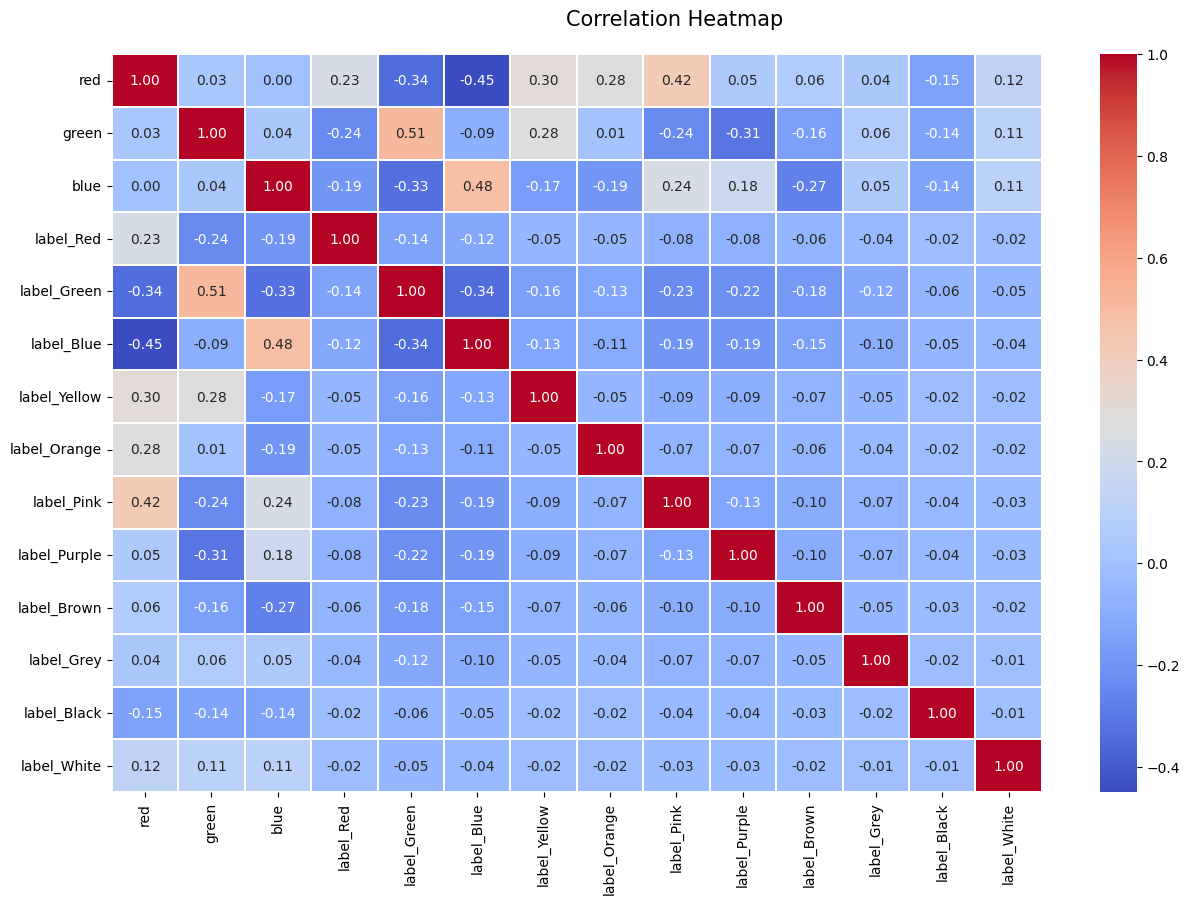

In [15]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 9))
corr = dataset.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=15)

# Split the data into train and test

In [16]:
train_dataset = dataset.sample(frac=0.8, random_state=8) #train = 80%,  random_state = any int value means every time when you run your program you will get the same output for train and test dataset, random_state is None by default which means every time when you run your program you will get different output because of splitting between train and test varies within
test_dataset = dataset.drop(train_dataset.index) #remove train_dataset from dataframe to get test_dataset
train_dataset

,red,green,blue,label_Red,label_Green,label_Blue,label_Yellow,label_Orange,label_Pink,label_Purple,label_Brown,label_Grey,label_Black,label_White
4185,189,148,192,False,False,False,False,False,False,True,False,False,False,False
3378,178,251,22,False,False,False,True,False,False,False,False,False,False,False
2744,54,9,125,False,False,True,False,False,False,False,False,False,False,False
968,119,147,60,False,True,False,False,False,False,False,False,False,False,False
2286,230,161,233,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,223,157,205,False,False,False,False,False,False,True,False,False,False,False
3707,203,8,10,True,False,False,False,False,False,False,False,False,False,False
881,154,153,123,False,False,False,False,False,False,False,False,True,False,False
1352,151,141,236,False,False,False,False,False,False,True,False,False,False,False


In [17]:
test_dataset

,red,green,blue,label_Red,label_Green,label_Blue,label_Yellow,label_Orange,label_Pink,label_Purple,label_Brown,label_Grey,label_Black,label_White
5,199,150,175,False,False,False,False,False,True,False,False,False,False,False
11,249,99,108,False,False,False,False,False,True,False,False,False,False,False
13,180,134,41,False,False,False,False,False,False,False,True,False,False,False
17,249,15,198,False,False,False,False,False,True,False,False,False,False,False
21,159,253,91,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5042,21,21,21,False,False,False,False,False,False,False,False,False,True,False
5043,22,22,22,False,False,False,False,False,False,False,False,False,True,False
5046,25,25,25,False,False,False,False,False,False,False,False,False,True,False
5047,26,26,26,False,False,False,False,False,False,False,False,False,True,False


## Split features: `red`, `green`, `blue` and labels

In [18]:
train_labels = pd.DataFrame([train_dataset.pop(x) for x in ['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]).T
train_labels

,label_Red,label_Green,label_Blue,label_Yellow,label_Orange,label_Pink,label_Purple,label_Brown,label_Grey,label_Black,label_White
4185,False,False,False,False,False,False,True,False,False,False,False
3378,False,False,False,True,False,False,False,False,False,False,False
2744,False,False,True,False,False,False,False,False,False,False,False
968,False,True,False,False,False,False,False,False,False,False,False
2286,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1883,False,False,False,False,False,False,True,False,False,False,False
3707,True,False,False,False,False,False,False,False,False,False,False
881,False,False,False,False,False,False,False,False,True,False,False
1352,False,False,False,False,False,False,True,False,False,False,False


In [19]:
train_dataset

,red,green,blue
4185,189,148,192
3378,178,251,22
2744,54,9,125
968,119,147,60
2286,230,161,233
...,...,...,...
1883,223,157,205
3707,203,8,10
881,154,153,123
1352,151,141,236


In [20]:
test_labels = pd.DataFrame([test_dataset.pop(x) for x in ['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]).T
test_labels

,label_Red,label_Green,label_Blue,label_Yellow,label_Orange,label_Pink,label_Purple,label_Brown,label_Grey,label_Black,label_White
5,False,False,False,False,False,True,False,False,False,False,False
11,False,False,False,False,False,True,False,False,False,False,False
13,False,False,False,False,False,False,False,True,False,False,False
17,False,False,False,False,False,True,False,False,False,False,False
21,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5042,False,False,False,False,False,False,False,False,False,True,False
5043,False,False,False,False,False,False,False,False,False,True,False
5046,False,False,False,False,False,False,False,False,False,True,False
5047,False,False,False,False,False,False,False,False,False,True,False


In [21]:
test_dataset

,red,green,blue
5,199,150,175
11,249,99,108
13,180,134,41
17,249,15,198
21,159,253,91
...,...,...,...
5042,21,21,21
5043,22,22,22
5046,25,25,25
5047,26,26,26


# Build & Compile the Model

## Set up the layers

In [22]:
from keras import regularizers
model = keras.Sequential([
    layers.Dense(3, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=[len(train_dataset.keys())]), #inputshape=[3]
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(11)
  ])

## Compile the model

In [23]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 24)                96        
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 16)                400       
                                                                 
 dense_4 (Dense)             (None, 11)                187       
                                                                 
Total params: 1295 (5.06 KB)
Trainable params: 1295 (5.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Param #

first layer: 3inputs\*3neurons + 1bias at each neuron = 3\*3 + 1\*3 = 12

second layer: 3inputs*24neurons +24biases = 72+24 = 96

third layer: 24inputs*24neurons +24biases = 576+24 = 600

fourth layer: 24inputs*16neurons +16biases = 384+16 = 400

fifth layer: 16inputs*11neurons +11biases = 176+11 = 187

## Train the model

In [25]:
history = model.fit(x=train_dataset, y=train_labels,
                    validation_split=0.2,
                    epochs=5001,
                    batch_size=2048,
                    verbose=0,
                    callbacks=[tfdocs.modeling.EpochDots()],
                    shuffle=True)


Epoch: 0, accuracy:0.0424,  loss:2.4489,  val_accuracy:0.1224,  val_loss:2.4453,  
....................................................................................................
Epoch: 100, accuracy:0.3260,  loss:1.8387,  val_accuracy:0.3177,  val_loss:1.8616,  
....................................................................................................
Epoch: 200, accuracy:0.3848,  loss:1.4884,  val_accuracy:0.3684,  val_loss:1.5020,  
....................................................................................................
Epoch: 300, accuracy:0.4089,  loss:1.3226,  val_accuracy:0.3770,  val_loss:1.3406,  
....................................................................................................
Epoch: 400, accuracy:0.4176,  loss:1.2840,  val_accuracy:0.4129,  val_loss:1.3083,  
....................................................................................................
Epoch: 500, accuracy:0.4253,  loss:1.2719,  val_accuracy:0.4240,  val_l

In [26]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
4996,0.476594,0.805135,0.501702,0.809642,4996
4997,0.476095,0.803897,0.501325,0.803461,4997
4998,0.475880,0.806062,0.501750,0.807169,4998
4999,0.477199,0.803588,0.504412,0.804697,4999
5000,0.475678,0.806990,0.500948,0.805933,5000


In [27]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'accuracy [Color]')

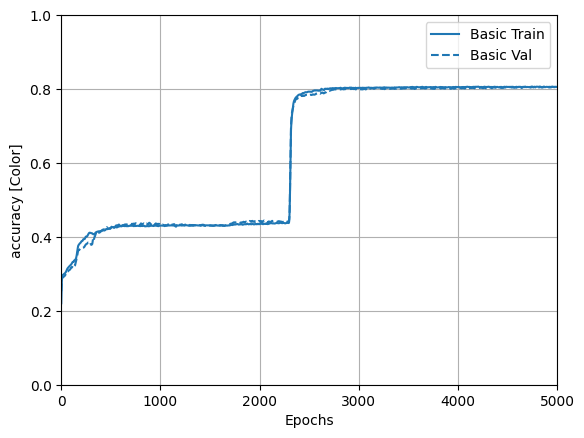

In [28]:
plotter.plot({'Basic': history}, metric = "accuracy")
plt.ylim([0, 1])
plt.ylabel('accuracy [Color]')

Text(0, 0.5, 'loss [Color]')

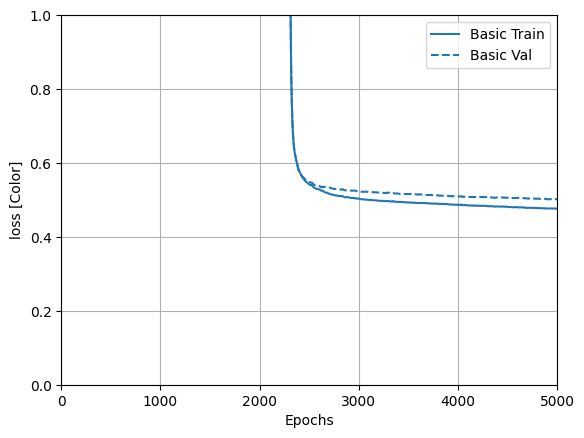

In [29]:
plotter.plot({'Basic': history}, metric = "loss")
plt.ylim([0, 1])
plt.ylabel('loss [Color]')

# Save Model

In [30]:
#Install PyDrive library into Google Colab notebook
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [31]:
#Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [32]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

In [33]:
# Save Model or weights on google drive and create on Colab directory in Google Drive

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('colormodel_acu_90.h5')
model_file = drive.CreateFile({'title' : 'colormodel_acu_90.h5'}) # colormodel_acu_  .h5 is the name of the model uploaded to Drive
model_file.SetContentFile('colormodel_acu_90.h5')
model_file.Upload()

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [34]:
# download to google drive
drive.CreateFile({'id': model_file.get('id')}) ### very important to run this last cell for loading the model in new notebook

GoogleDriveFile({'id': '1n7fTTdIO74xNZOGunJdYE4a-ofXePScv'})

In [72]:
#Load model from google drive into colab
file_obj = drive.CreateFile({'id': '1n7fTTdIO74xNZOGunJdYE4a-ofXePScv'})
file_obj.GetContentFile('colormodel_acu_90.h5') #colormodel_trained.h5 is the name of model uploaded to colab

In [73]:
ls

colormodel_acu_90.h5  colormodel_acu_90.h5.h5  final_data.csv  model_plot.png  sample_data/


In [74]:
# Recreate the exact same model, including its weights and the optimizer
model = tf.keras.models.load_model('colormodel_acu_90.h5') #very important

# Show the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 24)                96        
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 16)                400       
                                                                 
 dense_4 (Dense)             (None, 11)                187       
                                                                 
Total params: 1295 (5.06 KB)
Trainable params: 1295 (5.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Make Prediction

The prediction by the ANN model is an array of 11 numbers.

They represent the model's "confidence" that the RGB color corresponds to each of the 11 different classes of color as follows:

* 0 for Red
* 1 for Green
* 2 for Blue
* 3 for Yellow
* 4 for Orange
* 5 for Pink
* 6 for Purple
* 7 for Brown
* 8 for Grey
* 9 for Black
* 10 for White




You can see which out of the 11 labels has the highest confidence value

## Train Dataset Prediction

In [75]:
train_predictions = model.predict(train_dataset)
train_predictions

127/127 [==============================] - 0s 2ms/step


array([[  1.4561841 ,  -2.7100978 ,   1.6083524 , ...,   2.0540066 ,
        -14.975378  ,  -1.7096362 ],
       [-30.366592  ,  13.192523  , -13.288527  , ...,  -6.86378   ,
        -60.787422  , -32.005775  ],
       [ -8.544635  ,   1.5773915 ,   8.891213  , ...,   4.9501595 ,
          5.701673  ,  -2.6729221 ],
       ...,
       [-10.451081  ,   2.5525236 ,  -0.29788786, ...,   3.310752  ,
        -11.745856  ,  -1.73349   ],
       [ -6.4757605 ,  -0.21629879,   7.880577  , ...,   4.7558446 ,
          4.077164  ,  -3.673368  ],
       [-25.049664  ,   7.9995666 , -18.894045  , ...,  -9.081624  ,
        -72.13156   , -31.024492  ]], dtype=float32)

### Selecting Class with highest confidence

In [76]:
actual_encoded_train_labels = np.argmax(train_labels.to_numpy(), axis=1) #train_labels were originally in one-hot
actual_encoded_train_labels

array([6, 3, 2, ..., 8, 6, 3])

In [77]:
predicted_encoded_train_labels = np.argmax(train_predictions, axis=1)
predicted_encoded_train_labels

array([6, 1, 2, ..., 7, 6, 3])

### Converting numpy array to pandas dataframe

In [78]:
actual_encoded_train_labels = pd.DataFrame(actual_encoded_train_labels, columns=['Labels'])
actual_encoded_train_labels

,Labels
0,6
1,3
2,2
3,1
4,5
...,...
4037,6
4038,0
4039,8
4040,6


In [79]:
predicted_encoded_train_labels = pd.DataFrame(predicted_encoded_train_labels, columns=['Labels'])
predicted_encoded_train_labels

,Labels
0,6
1,1
2,2
3,1
4,6
...,...
4037,5
4038,0
4039,7
4040,6


### Visualize Prediction for Train Dataset

In [80]:
#Plot Actual vs Predicted Class for Training Dataset
actual_chart = go.Scatter(x=actual_encoded_train_labels.index, y=actual_encoded_train_labels.Labels, name= 'Actual Label')
predict_chart = go.Scatter(x=actual_encoded_train_labels.index, y=predicted_encoded_train_labels.Labels, name= 'Predicted Label')
py.iplot([predict_chart, actual_chart])

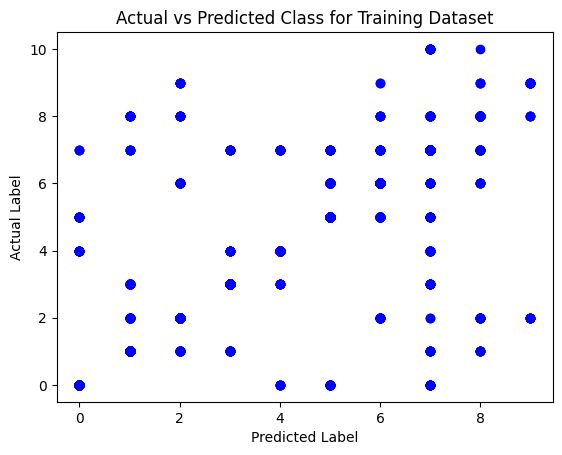

In [81]:
import matplotlib.pyplot as plt

# Create scatter plot for actual vs predicted labels
plt.scatter(predicted_encoded_train_labels, actual_encoded_train_labels.Labels, color='blue')

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Actual vs Predicted Class for Training Dataset')

# Show the plot
plt.show()


## Test Dataset Prediction

In [82]:
test_predictions = model.predict(test_dataset)
test_predictions

32/32 [==============================] - 0s 2ms/step


array([[ 2.15002251e+00, -3.60824275e+00,  2.01243758e-02, ...,
         1.14639473e+00, -1.98377037e+01, -7.83613563e-01],
       [ 1.15376215e+01, -9.48363590e+00, -9.56931400e+00, ...,
        -6.88989305e+00, -5.51345787e+01, -2.29756451e+00],
       [-1.18044300e+01,  1.12413752e+00, -1.01059923e+01, ...,
        -2.39509392e+00, -3.99785538e+01, -1.00607405e+01],
       ...,
       [-9.30180454e+00,  3.82027721e+00,  7.51599550e+00, ...,
         7.71269178e+00,  9.79181480e+00,  4.28286791e+00],
       [-9.28165817e+00,  3.79010892e+00,  7.48759890e+00, ...,
         7.71145821e+00,  9.76053905e+00,  4.28962994e+00],
       [-9.19558716e+00,  3.71706867e+00,  7.38571310e+00, ...,
         7.65944433e+00,  9.48524761e+00,  4.28494263e+00]], dtype=float32)

### Selecting Class with highest confidence

In [83]:
actual_encoded_test_labels = np.argmax(test_labels.to_numpy(), axis=1)
actual_encoded_test_labels

array([5, 5, 7, ..., 9, 9, 9])

In [84]:
predicted_encoded_test_labels = np.argmax(test_predictions, axis=1)
predicted_encoded_test_labels

array([7, 0, 3, ..., 9, 9, 9])

### Converting numpy array to pandas dataframe

In [85]:
actual_encoded_test_labels = pd.DataFrame(actual_encoded_test_labels, columns=['Labels'])
actual_encoded_test_labels

,Labels
0,5
1,5
2,7
3,5
4,1
...,...
1005,9
1006,9
1007,9
1008,9


In [86]:
predicted_encoded_test_labels = pd.DataFrame(predicted_encoded_test_labels, columns=['Labels'])
predicted_encoded_test_labels

,Labels
0,7
1,0
2,3
3,5
4,1
...,...
1005,9
1006,9
1007,9
1008,9


### Visualize Prediction for Test Dataset

In [87]:
#Plot Actual vs Predicted Class for Test Dataset
actual_chart = go.Scatter(x=actual_encoded_test_labels.index, y=actual_encoded_test_labels.Labels, name= 'Actual Label')
predict_chart = go.Scatter(x=actual_encoded_test_labels.index, y=predicted_encoded_test_labels.Labels, name= 'Predicted Label')
py.iplot([predict_chart, actual_chart])

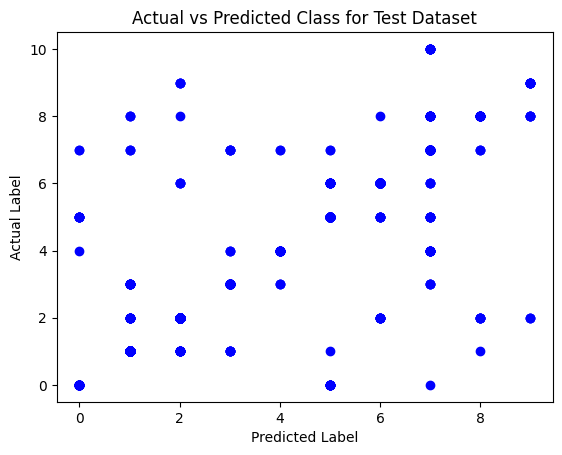

In [88]:
import matplotlib.pyplot as plt

# Create scatter plot for actual vs predicted labels
plt.scatter(predicted_encoded_test_labels, actual_encoded_test_labels.Labels, color='blue')

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Actual vs Predicted Class for Test Dataset')

# Show the plot
plt.show()


# Evaluate Model

## Evaluating for Training Dataset

In [89]:
model.evaluate(x=train_dataset, y=train_labels)

127/127 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.8068


[0.4812820553779602, 0.8067788481712341]

In [90]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix_train = confusion_matrix(actual_encoded_train_labels, predicted_encoded_train_labels)
confusion_matrix_train

array([[ 133,    0,    0,    0,    7,   35,    0,   15,    0,    0,    0],
       [   0, 1070,   43,   23,    0,    0,    0,    9,    7,    0,    0],
       [   0,   47,  777,    0,    0,    0,   35,    2,   19,    8,    0],
       [   0,   48,    0,  154,    8,    0,    0,   15,    0,    0,    0],
       [  15,    0,    0,   11,  108,    0,    0,   33,    0,    0,    0],
       [  19,    0,    0,    0,    0,  371,   62,   20,    0,    0,    0],
       [   0,    0,   24,    0,    0,   69,  336,   10,    6,    0,    0],
       [   3,    6,    0,    9,   15,   16,   20,  214,   30,    0,    0],
       [   0,   14,    9,    0,    0,    0,    6,   27,   73,    4,    0],
       [   0,    0,    7,    0,    0,    0,    2,    0,    4,   25,    0],
       [   0,    0,    0,    0,    0,    0,    0,   18,    1,    0,    0]])

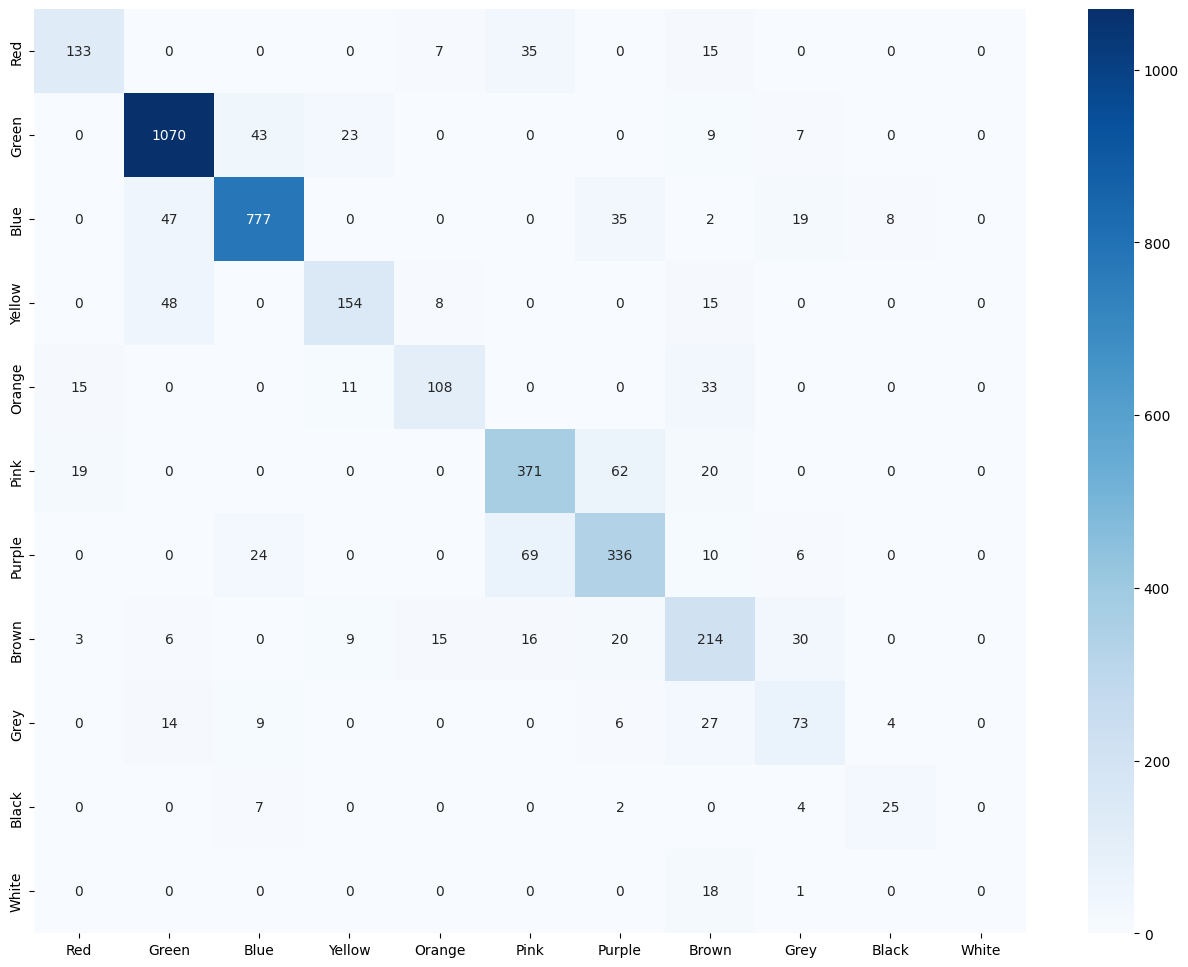

In [91]:
f,ax = plt.subplots(figsize=(16,12))
categories = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
sns.heatmap(confusion_matrix_train, annot=True, cmap='Blues', fmt='d',
            xticklabels = categories,
            yticklabels = categories)
plt.show()

In [92]:
#newest model performance report
target_names = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
print(classification_report(actual_encoded_train_labels, predicted_encoded_train_labels, target_names=target_names))

              precision    recall  f1-score   support

         Red       0.78      0.70      0.74       190
       Green       0.90      0.93      0.92      1152
        Blue       0.90      0.88      0.89       888
      Yellow       0.78      0.68      0.73       225
      Orange       0.78      0.65      0.71       167
        Pink       0.76      0.79      0.77       472
      Purple       0.73      0.76      0.74       445
       Brown       0.59      0.68      0.63       313
        Grey       0.52      0.55      0.53       133
       Black       0.68      0.66      0.67        38
       White       0.00      0.00      0.00        19

    accuracy                           0.81      4042
   macro avg       0.67      0.66      0.67      4042
weighted avg       0.81      0.81      0.81      4042



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Evaluating for Test Dataset

In [93]:
model.evaluate(x=test_dataset, y=test_labels)

32/32 [==============================] - 0s 3ms/step - loss: 0.5025 - accuracy: 0.8050


[0.5025411248207092, 0.804950475692749]

In [94]:
confusion_matrix_test = confusion_matrix(actual_encoded_test_labels, predicted_encoded_test_labels)
confusion_matrix_test

array([[ 33,   0,   0,   0,   0,  12,   0,   1,   0,   0,   0],
       [  0, 283,  14,   6,   0,   1,   0,   0,   1,   0,   0],
       [  0,  12, 189,   0,   0,   0,   9,   0,   6,   3,   0],
       [  0,  12,   0,  41,   3,   0,   0,   4,   0,   0,   0],
       [  1,   0,   0,   3,  22,   0,   0,  12,   0,   0,   0],
       [  8,   0,   0,   0,   0,  84,   7,   8,   0,   0,   0],
       [  0,   0,   4,   0,   0,  13,  87,   4,   0,   0,   0],
       [  2,   3,   0,   5,   2,   2,   0,  46,   3,   0,   0],
       [  0,   3,   1,   0,   0,   0,   1,  12,  19,   5,   0],
       [  0,   0,   4,   0,   0,   0,   0,   0,   0,   9,   0],
       [  0,   0,   0,   0,   0,   0,   0,  10,   0,   0,   0]])

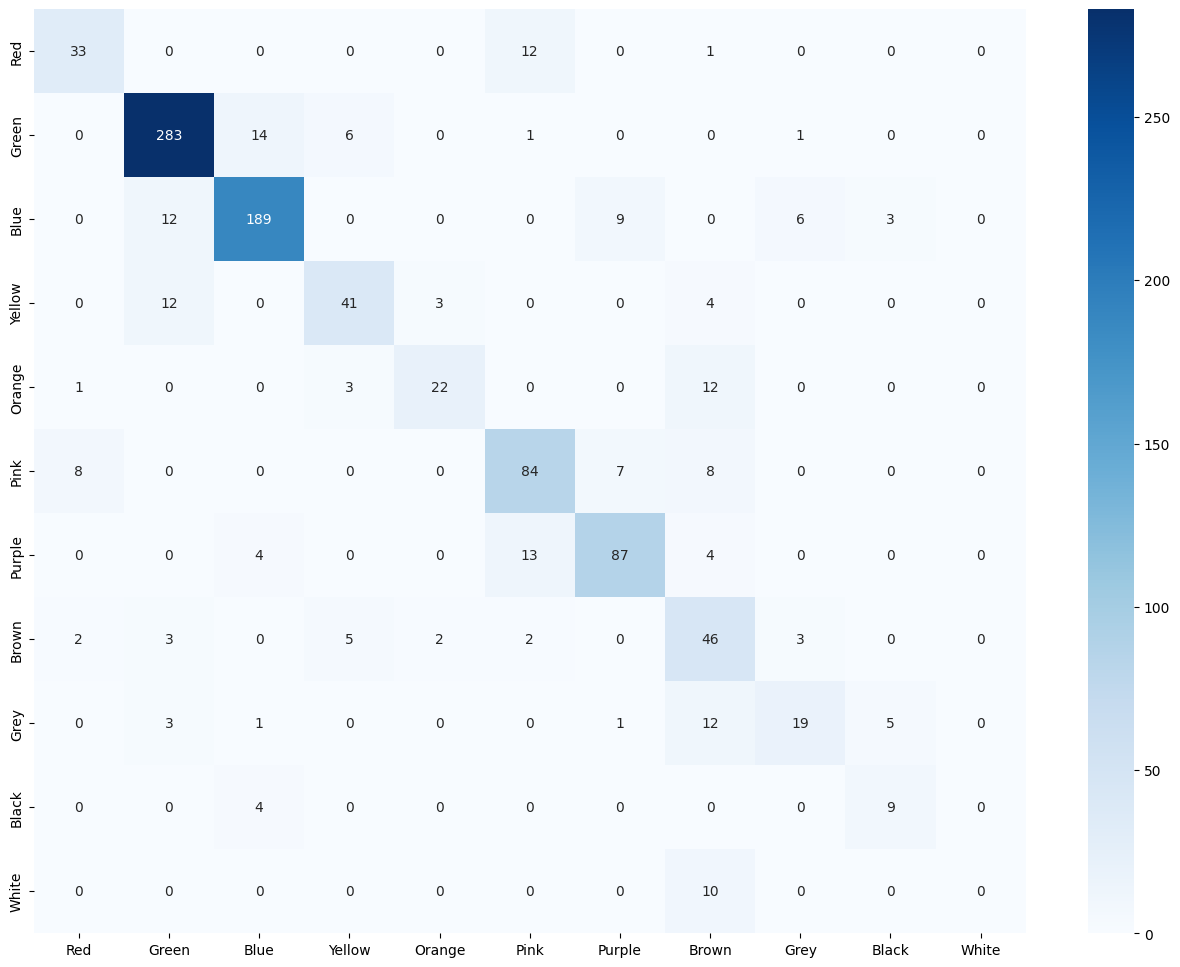

In [95]:
f,ax = plt.subplots(figsize=(16,12))
categories = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
sns.heatmap(confusion_matrix_test, annot=True, cmap='Blues', fmt='d',
            xticklabels = categories,
            yticklabels = categories)
plt.show()

In [96]:
#newest
target_names = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
print(classification_report(actual_encoded_test_labels, predicted_encoded_test_labels, target_names=target_names))

              precision    recall  f1-score   support

         Red       0.75      0.72      0.73        46
       Green       0.90      0.93      0.92       305
        Blue       0.89      0.86      0.88       219
      Yellow       0.75      0.68      0.71        60
      Orange       0.81      0.58      0.68        38
        Pink       0.75      0.79      0.77       107
      Purple       0.84      0.81      0.82       108
       Brown       0.47      0.73      0.58        63
        Grey       0.66      0.46      0.54        41
       Black       0.53      0.69      0.60        13
       White       0.00      0.00      0.00        10

    accuracy                           0.80      1010
   macro avg       0.67      0.66      0.66      1010
weighted avg       0.81      0.80      0.80      1010



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# Visualizing Model Architecture

In [97]:
#Libraries to visualize model
!pip install ann_visualizer
!pip install graphviz

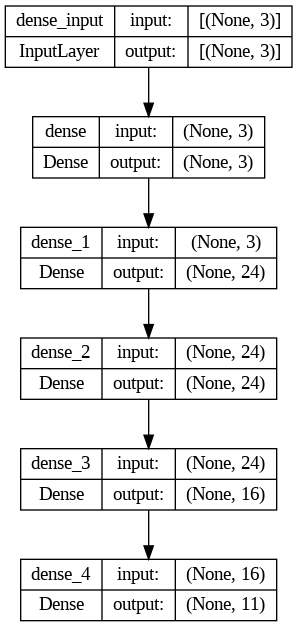

In [98]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model

# Load the entire model (including architecture and weights)
model = load_model("colormodel_acu_90.h5")

# Plot the model architecture to a file
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
